In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# data processing

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Urban']=le.fit_transform(df['Urban'])

In [10]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [11]:
df['tax_catagory']=''

In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_catagory
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,


In [13]:
for i in range(len(df['Taxable.Income'])):
    if df['Taxable.Income'][i]<=30000:
         df['tax_catagory'][i]='0'
    else :
        df['tax_catagory'][i]='1'
                  

In [14]:
df['tax_catagory'].nunique()

2

In [15]:
df["tax_catagory"] =df["tax_catagory"].astype("int")

In [16]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_catagory
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


# model building

In [17]:
x=df.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=df['tax_catagory']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

## model training

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf=RandomForestClassifier().fit(x_train,y_train)

### model testing


In [21]:
yp_train=rf.predict(x_train)
yp_test=rf.predict(x_test)

### model evaluation

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [23]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      0.89      0.88       107

    accuracy                           0.79       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.78      0.79      0.79       120



In [24]:
confusion_matrix(y_test,yp_test)

array([[ 0, 13],
       [12, 95]], dtype=int64)

In [25]:
accuracy_score(y_test,yp_test)

0.7916666666666666

In [26]:
import seaborn as sns

<AxesSubplot:>

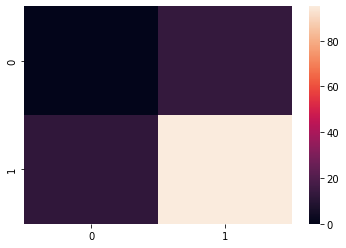

In [27]:
cm=confusion_matrix(y_test,yp_test)
sns.heatmap(cm)


In [28]:
auc=roc_auc_score(y_test,yp_test)
auc

0.4439252336448598

In [29]:
from sklearn.model_selection import GridSearchCV
grid_data=GridSearchCV(estimator=rf,param_grid={'criterion':['entropy','gini'],
                                               'max_depth':[1,2,3,4,5,6],
                                                'n_estimators':[20,50,80,100]})

In [30]:
grid_data.fit(x_train,y_train)
print(grid_data.best_params_)
print(grid_data.best_score_)

{'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 20}
0.76875


In [31]:
rf2=RandomForestClassifier(criterion='entropy', max_depth= 1, n_estimators=20).fit(x_train,y_train)

In [32]:
yp_train2=rf2.predict(x_train)
yp_test2=rf2.predict(x_test)

In [33]:
print(classification_report(y_test,yp_test2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



In [34]:
accuracy_score(y_test,yp_test2)

0.8916666666666667

<AxesSubplot:>

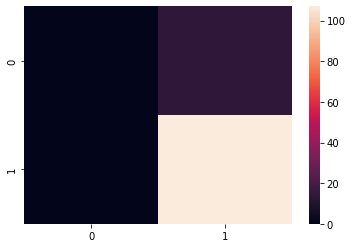

In [35]:
cm=confusion_matrix(y_test,yp_test2)
sns.heatmap(cm)

In [36]:
df['tax_catagory'].value_counts()

1    476
0    124
Name: tax_catagory, dtype: int64

<AxesSubplot:xlabel='tax_catagory', ylabel='count'>

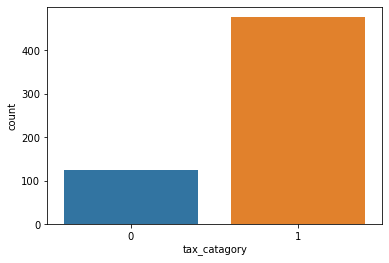

In [37]:
sns.countplot(df['tax_catagory'])

Countplot clearly shows that, the data are highly imbalanced, it may affect the accuaracy of the model

It need to be balanced for obtaining best model

In [38]:
# data imbalance is decreased by class weight method

In [46]:
df_model=RandomForestClassifier(class_weight={0:4,1:1})

In [47]:
df_model.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 4, 1: 1})

In [48]:
yp_test3=df_model.predict(x_test)

In [49]:
print(classification_report(y_test,yp_test3))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      0.88      0.88       107

    accuracy                           0.78       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.78      0.78      0.78       120



In [50]:
accuracy_score(y_test,yp_test3)

0.7833333333333333

In [45]:
# here our accuracy score is improved by using this method

In [51]:
# here my rf2 model has the most accuracy score

# ----------------------------------------------